In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv(r"C:\Users\munki\Desktop\Resus MSC Year 3 SPP project\CWHEDdata.csv")

C:\Users\munki\AppData\Local\Temp\ipykernel_26344\4170605204.py:1: DtypeWarning: Columns (10,11,12,13,14,16,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\munki\Desktop\Resus MSC Year 3 SPP project\CWHEDdata.csv")


In [6]:
cols_to_convert = ['respiratory', 'sp02', 'systolic', 'diastolic', 'heartrate', 'temp', 'news','pain', 'gcs']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce').astype(float)

In [7]:
import numpy as np

# Create a mapping of unique problem values to numerical codes
problem_mapping = {problem: code for code, problem in enumerate(df['problem'].dropna().unique(), 1)}

# Map the problem column to the numerical codes
df['problem_encoded'] = df['problem'].map(problem_mapping)

# Replace specific encoded values with NaN
df['problem_encoded'].replace({47: np.nan}, inplace=True)

# Print the original values and their corresponding encoded values
for problem, code in problem_mapping.items():
    print(f"Original Value: {problem}\tEncoded Value: {code}")


# Create a mapping of unique conscious values to numerical codes
conscious_mapping = {conscious: code for code, conscious in enumerate(df['conscious'].dropna().unique(), 1)}

# Map the conscious column to the numerical codes
df['conscious_encoded'] = df['conscious'].map(conscious_mapping)

# Replace specific encoded values with NaN
df['conscious_encoded'].replace({5: np.nan}, inplace=True)

# Print the original values and their corresponding encoded values
for conscious, code in conscious_mapping.items():
    print(f"Original Value: {conscious}\tEncoded Value: {code}")


# Create a mapping of unique oxydev values to numerical codes
oxydev_mapping = {oxydev: code for code, oxydev in enumerate(df['oxydev'].dropna().unique(), 1)}

# Map the oxydev column to the numerical codes
df['oxydev_encoded'] = df['oxydev'].map(oxydev_mapping)

# Replace specific encoded values with NaN
df['oxydev_encoded'].replace({5: np.nan}, inplace=True)

# Print the original values and their corresponding encoded values
for oxydev, code in oxydev_mapping.items():
    print(f"Original Value: {oxydev}\tEncoded Value: {code}")


Original Value: Abscesses and Local Infections	Encoded Value: 1
Original Value: Facial Problems	Encoded Value: 2
Original Value: Chest Pain	Encoded Value: 3
Original Value: Limb Problems	Encoded Value: 4
Original Value: Back Pain	Encoded Value: 5
Original Value: Apparently Drunk	Encoded Value: 6
Original Value: Headache	Encoded Value: 7
Original Value: Unwell Adult	Encoded Value: 8
Original Value: Eye Problems	Encoded Value: 9
Original Value: Abdominal Pain in Adults	Encoded Value: 10
Original Value: Mental Illness	Encoded Value: 11
Original Value: Assault	Encoded Value: 12
Original Value: Wounds	Encoded Value: 13
Original Value: Fits	Encoded Value: 14
Original Value: Shortness of Breath in Adults	Encoded Value: 15
Original Value: Neck pain	Encoded Value: 16
Original Value: Urinary Problems	Encoded Value: 17
Original Value: Allergy	Encoded Value: 18
Original Value: Pregnancy	Encoded Value: 19
Original Value: Head Injury	Encoded Value: 20
Original Value: GI Bleeding	Encoded Value: 21
Or

In [8]:
df.drop(['problem', 'conscious', 'oxydev'], axis=1, inplace=True)

In [9]:
df.replace("NULL", np.nan, inplace=True)
# Replace missing and "NULL" values with NaN
df.replace(['missing', 'NULL'], np.nan, inplace=True)

# iterative imputer

In [13]:
from sklearn.experimental import enable_iterative_imputer


In [14]:
from sklearn.impute import IterativeImputer

# Replace 'missing' and 'NULL' values with NaN
df.replace(['missing', 'NULL'], np.nan, inplace=True)

# Select only the numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Create an instance of IterativeImputer
imputer = IterativeImputer()

# Fit the imputer on the numeric columns and transform them
numeric_columns_imputed = pd.DataFrame(imputer.fit_transform(numeric_columns), columns=numeric_columns.columns)

# Replace the numeric columns in the original DataFrame with the imputed values
df[numeric_columns.columns] = numeric_columns_imputed

# Now the NaN values in the numeric columns are replaced with imputed values

#The IterativeImputer expects numerical values for imputation, so it won't work directly with a DataFrame that contains non-numeric columns.

# To overcome this issue, you can first select only the numeric columns from your DataFrame and apply the imputation process


C:\Users\munki\anaconda\lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [15]:
print(df.isna().sum())

age                  0
sex                  0
triage               0
mode                 0
arHour               0
arDay                0
arMonth              0
daysdischarged       0
utilisation          0
respiratory          0
sp02                 0
systolic             0
diastolic            0
heartrate            0
temp                 0
news                 0
pain                 0
gcs                  0
oxyflow              0
admittance           0
problem_encoded      0
conscious_encoded    0
oxydev_encoded       0
dtype: int64


In [16]:
df.head(10). T

,0,1,2,3,4,5,6,7,8,9
age,24.0,72.000000,51.000000,45.00000,53.000000,25.000000,19.000000,38.0,38.000000,50.000000
sex,2.0,1.000000,1.000000,1.00000,2.000000,1.000000,2.000000,1.0,1.000000,1.000000
triage,4.0,5.000000,3.000000,2.00000,3.000000,3.000000,2.000000,4.0,3.000000,3.000000
mode,1.0,2.000000,1.000000,1.00000,1.000000,1.000000,2.000000,2.0,1.000000,1.000000
arHour,15.0,3.000000,1.000000,14.00000,11.000000,21.000000,1.000000,2.0,15.000000,15.000000
arDay,5.0,2.000000,2.000000,3.00000,2.000000,7.000000,7.000000,3.0,5.000000,2.000000
arMonth,1.0,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000
daysdischarged,0.0,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
utilisation,0.0,6.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
respiratory,20.0,18.000000,17.000000,20.00000,17.588185,17.134982,12.000000,17.0,17.524594,18.000000


In [32]:
print(df.describe())

                 age            sex         triage           mode  \
count  164438.000000  164438.000000  164438.000000  164438.000000   
mean       47.756954       1.551372       3.391459       1.236071   
std        20.691256       0.497338       0.688207       0.424667   
min        17.000000       1.000000      -0.345389       1.000000   
25%        30.000000       1.000000       3.000000       1.000000   
50%        44.000000       2.000000       3.482879       1.000000   
75%        63.000000       2.000000       4.000000       1.000000   
max       122.000000       2.000000       5.000000       2.000000   

              arHour          arDay        arMonth  daysdischarged  \
count  164438.000000  164438.000000  164438.000000   164438.000000   
mean       13.373667       3.880350       6.592637       25.363912   
std         5.736881       1.990635       3.409893       68.250103   
min         0.000000       1.000000       1.000000        0.000000   
25%        10.000000       2

In [17]:
X = df.drop('admittance', axis=1)  # Assuming 'admittance' is the target variable
y = df['admittance']

In [18]:
# to scale the data for better result
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
d_scaled = scaler.fit_transform(X)
data_scaled1 = pd.DataFrame(d_scaled)
data_scaled1.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.148167,0.902063,0.884245,-0.555897,0.283488,0.562460,-1.640126,-0.371633,-0.317016,1.147331,...,-0.631672,-0.449449,2.135056,-0.833568,1.637936,0.115370,-0.197302,-1.203316,-0.096773,-0.105321
1,1.171660,-1.108650,2.337302,1.798894,-1.808247,-0.944601,-1.640126,-0.342329,2.843780,0.131980,...,-2.632271,0.206004,-0.423989,-0.833568,-1.318125,0.115370,-0.372351,-1.098998,-0.096773,-0.105321
2,0.156736,-1.108650,-0.568812,-0.555897,-2.156869,-0.944601,-1.640126,-0.371633,-0.317016,-0.375696,...,-0.298239,0.451798,-0.030289,-0.833568,1.145259,0.273931,-0.192485,-1.098998,-0.096773,-0.105321
3,-0.133243,-1.108650,-2.021868,-0.555897,0.109177,-0.442247,-1.640126,-0.371633,-0.317016,1.147331,...,0.368627,-1.432628,-0.030289,-0.079801,1.145259,0.115370,0.135646,-0.994681,-0.096773,-0.105321
4,0.253395,0.902063,-0.568812,-0.555897,-0.413757,-0.944601,-1.640126,-0.371633,-0.317016,-0.077088,...,0.132289,-0.123060,-0.073673,-0.202507,0.652583,0.142463,-0.018890,-0.890364,-0.091520,-0.130391


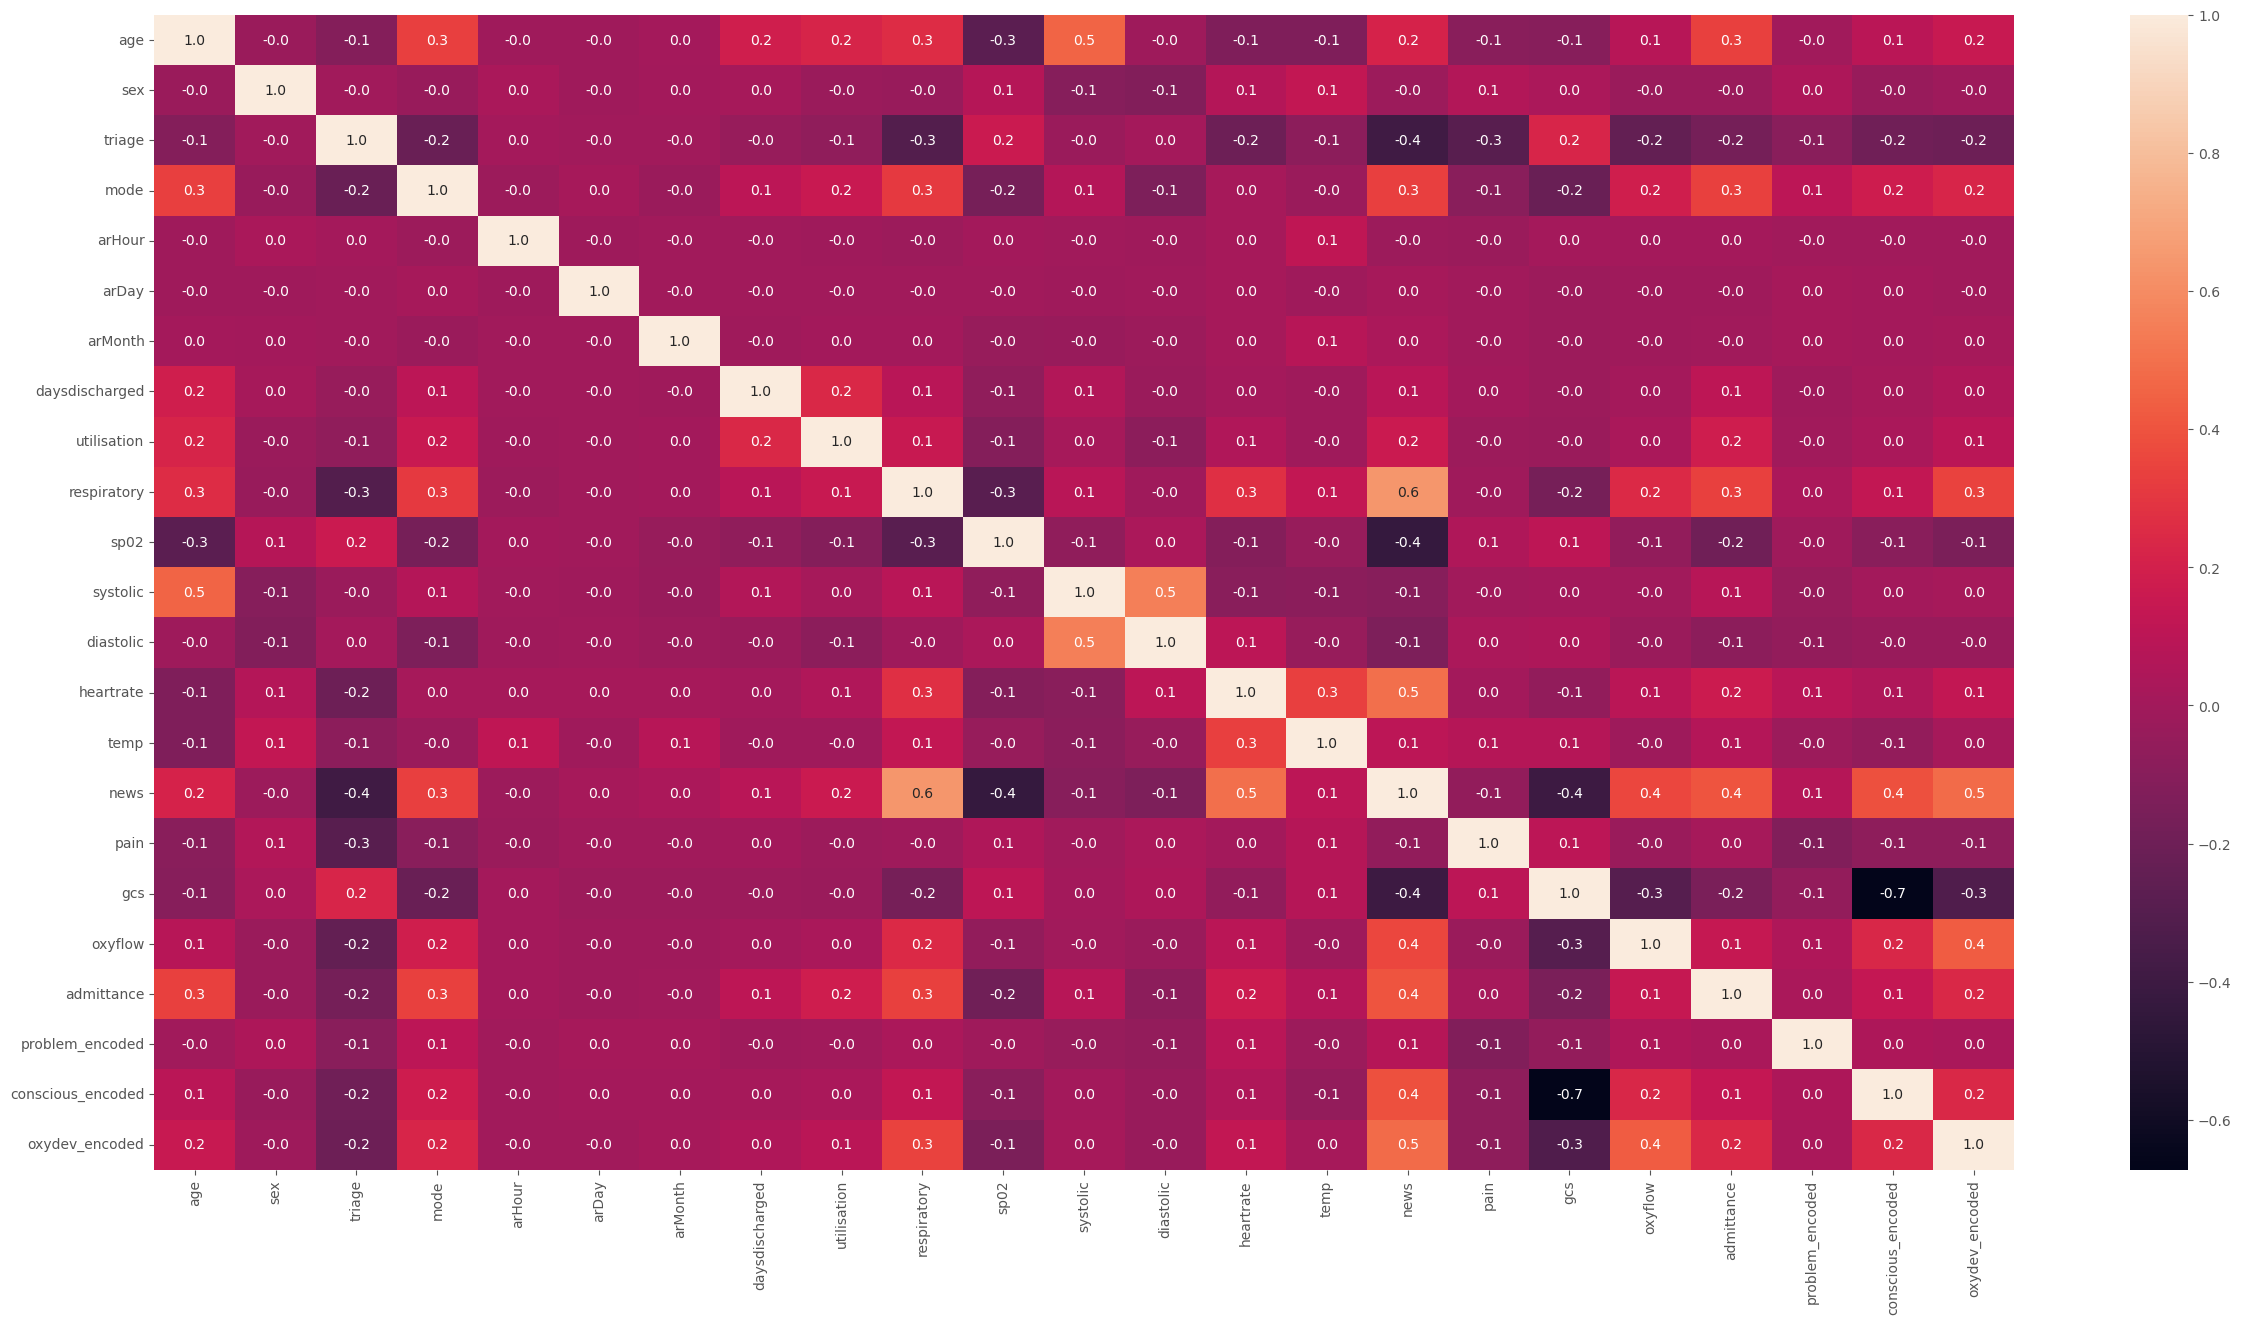

In [19]:
plt.figure(figsize=(30,15))
sns.heatmap(df.corr(),annot=True,fmt='.1f')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

# Split the input data
In_train, In_test, Out_train, Out_test = train_test_split(data_scaled1, y, test_size=0.2, random_state=42)

# Test sets values
Out_count = pd.Series(Out_test).value_counts()
Out_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count
})

class_index = 1  # Replace with the desired class index

# MODEL

In [21]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import f_classif


# LOGISTIC REGRESSION

In [41]:
#Set/Train Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(In_train, Out_train)
#LogReg Prediction
logreg_pred = logreg.predict(In_test)
print('Original Output:' , Out_test.values)
print('Predicted Output:' , logreg_pred)

# Display the output values
logreg_count = pd.Series(logreg_pred).value_counts()
logreg_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': logreg_count
})
print(logreg_count_df)
print('Correct class 1s:' ,(logreg_count[1]/Out_count[1])*100)

# Predict probabilities for the test set
logreg_pred_proba = logreg.predict_proba(In_test)
# Extract the predicted probabilities for the desired class
logreg_pred_proba_class = logreg_pred_proba[:, class_index]

# Calculate AUROC score
#logreg_auroc_score = roc_auc_score(Out_test, logreg_pred_proba, multi_class='ovr')
logreg_auroc_score = roc_auc_score(Out_test, logreg_pred_proba_class)
# Calculate AUROC curve
logreg_fpr, logreg_tpr, logreg_thresholds = roc_curve(Out_test, logreg_pred_proba_class, pos_label=class_index)
# Calculate accuracy
logreg_accuracy = accuracy_score(Out_test, logreg_pred)
# Compute the precision score
logreg_precision = precision_score(Out_test, logreg_pred, average='weighted')
# Compute the recall score
logreg_recall = recall_score(Out_test, logreg_pred, average='weighted')
# Calculate the f1 for the predicted class
logreg_f1 = f1_score(Out_test, logreg_pred)


# Display AUROC score, and accuracy
print("\n")
print("LogReg AUROC Score:", logreg_auroc_score)
print("LogReg Accuracy:", logreg_accuracy)
print("LogReg Precision:", logreg_precision)
print("LogReg Recall:", logreg_recall)
print("LogReg F1 score:", logreg_f1)

logreg_results = [
    'LogisticRegression',
    logreg_auroc_score, 
    logreg_accuracy, 
    logreg_precision, 
    logreg_precision,
    logreg_f1,
    logreg_count[1],
    Out_count[1]
]


import numpy as np
from sklearn.utils import resample

# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(logreg_pred_proba_class)))
    bootstrap_pred = logreg_pred_proba_class[bootstrap_indices]
    bootstrap_true = Out_test.values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("LogReg AUROC Score:", logreg_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Original Output: [0. 0. 0. ... 0. 1. 0.]
Predicted Output: [0. 0. 0. ... 0. 1. 0.]
    Class  Intended Output  Predicted Output
0.0     0            26178             29282
1.0     1             6710              3606
Correct class 1s: 53.740685543964226


LogReg AUROC Score: 0.8547995216515524
LogReg Accuracy: 0.8392726830454877
LogReg Precision: 0.82423881739851
LogReg Recall: 0.8392726830454877
LogReg F1 score: 0.4875920899573479


LogReg AUROC Score: 0.8547995216515524
95% Confidence Interval: [0.850, 0.860]


In [61]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Out_test, logreg_pred)

# Extract the TP, TN, FP, FN values
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Compute sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Compute specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Display sensitivity and specificity
print("LogReg Sensitivity:", sensitivity)
print("LogReg Specificity:", specificity)

LogReg Sensitivity: 0.37481371087928467
LogReg Specificity: 0.9583237833295133


# NEURAL NET

In [22]:
from sklearn.neural_network import MLPClassifier
from warnings import filterwarnings

# Create a neural network classifier
#Nnet = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', solver='adam', max_iter=1000)
Nnet = MLPClassifier(hidden_layer_sizes=(10,), activation='logistic', solver='adam', max_iter=1000)

# Train the model
filterwarnings("ignore", category=UserWarning)  # Ignore convergence warning
Nnet.fit(In_train, Out_train)

# Make predictions on the test set
Nnet_pred = Nnet.predict(In_test)
print('Original Output:' , Out_test.values)
print('Predicted Output:' , Nnet_pred)

# Display the output values
Nnet_count = pd.Series(Nnet_pred).value_counts()
Nnet_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': Nnet_count
})
print(Nnet_count_df)
print('Correct class 1s:' , (Nnet_count[1]/Out_count[1])*100)

# Predict probabilities for the test set
Nnet_pred_proba = Nnet.predict_proba(In_test)
Nnet_pred_proba_class = Nnet_pred_proba[:, class_index]

# Calculate AUROC score
Nnet_auroc_score = roc_auc_score(Out_test, Nnet_pred_proba_class, multi_class='ovr')
# Calculate AUROC curve
Nnet_fpr, Nnet_tpr, Nnet_thresholds = roc_curve(Out_test, Nnet_pred_proba_class, pos_label=class_index)
# Calculate the accuracy score
Nnet_accuracy = accuracy_score(Out_test, Nnet_pred)
# Compute the precision score
Nnet_precision = precision_score(Out_test, Nnet_pred, average='weighted', zero_division=1)
# Compute the recall score
Nnet_recall = recall_score(Out_test, Nnet_pred, average='weighted')
# Calculate the f1 for the predicted class
Nnet_f1 = f1_score(Out_test, Nnet_pred)

# Display AUROC score, and accuracy
print("\n")
print("Nnet AUROC Score:", Nnet_auroc_score)
print("Nnet Accuracy:", Nnet_accuracy)
print("Nnet Precision:", Nnet_precision)
print("Nnet Recall:", Nnet_recall)
print("Nnet F1:", Nnet_f1)


Nnet_results = [
    'NeuralNet',
    Nnet_auroc_score, 
    Nnet_accuracy, 
    Nnet_precision, 
    Nnet_precision,
    Nnet_f1,
    Nnet_count[1],
    Out_count[1]
]

import numpy as np
from sklearn.utils import resample

# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(Nnet_pred_proba_class)))
    bootstrap_pred = Nnet_pred_proba_class[bootstrap_indices]
    bootstrap_true = Out_test.values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("Nnet AUROC Score:", Nnet_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Original Output: [0. 0. 0. ... 0. 1. 0.]
Predicted Output: [0. 0. 0. ... 0. 1. 0.]
    Class  Intended Output  Predicted Output
0.0     0            26178             27280
1.0     1             6710              5608
Correct class 1s: 83.57675111773473


Nnet AUROC Score: 0.9533088898779524
Nnet Accuracy: 0.9095718803210897
Nnet Precision: 0.9064825516760141
Nnet Recall: 0.9095718803210897
Nnet F1: 0.758564702062023


Nnet AUROC Score: 0.9533088898779524
95% Confidence Interval: [0.951, 0.956]


In [23]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Out_test, Nnet_pred)

# Extract the TP, TN, FP, FN values
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

# Compute sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Compute specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Display sensitivity and specificity
print("Nnet Sensitivity:", sensitivity)
print("Nnet Specificity:", specificity)


Nnet Sensitivity: 0.696274217585693
Nnet Specificity: 0.9642447856979143


In [24]:
import pickle

# Save the model to a file
with open("nnet_model.pkl", "wb") as file:
    pickle.dump(Nnet, file)


# DECISION TREE

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Create a decision tree classifier
dtree = DecisionTreeClassifier(max_depth=100, criterion = "entropy", min_samples_split=50)

# Train the classifier on the training data
dtree.fit(In_train, Out_train)

# Predict the target variable for the test set
dtree_pred = dtree.predict(In_test)
print('Original Output:' , Out_test.values)
print('Predicted Output:' , dtree_pred)

# Display the output values
dtree_count = pd.Series(dtree_pred).value_counts()
dtree_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': dtree_count
})
print(dtree_count_df)
print('Correct class 1s:' , (dtree_count[1]/Out_count[1])*100)

# Predict probabilities for the test set
dtree_pred_proba = dtree.predict_proba(In_test)
dtree_pred_proba_class = dtree_pred_proba[:, class_index]

# Calculate AUROC score
dtree_auroc_score = roc_auc_score(Out_test, dtree_pred_proba_class, multi_class='ovr')
# Calculate AUROC curve
dtree_fpr, dtree_tpr, dtree_thresholds = roc_curve(Out_test, dtree_pred_proba_class, pos_label=class_index)
# Calculate the accuracy score
dtree_accuracy = accuracy_score(Out_test, dtree_pred)
# Compute the precision score
dtree_precision = precision_score(Out_test, dtree_pred, average='weighted')
# Compute the recall score
dtree_recall = recall_score(Out_test, dtree_pred, average='weighted')
# Calculate the f1 for the predicted class
dtree_f1 = f1_score(Out_test, dtree_pred)


# Display AUROC score, and accuracy
print("\n")
print("Dtree AUROC Score:", dtree_auroc_score)
print("Dtree Accuracy:", dtree_accuracy)
print("Dtree Precision:", dtree_precision)
print("Dtree Recall:", dtree_recall)
print("Dtree F1:", dtree_f1)

dtree_results = [
    'DecisionTree',
    dtree_auroc_score, 
    dtree_accuracy,
    dtree_precision, 
    dtree_precision,
    dtree_f1,
    dtree_count[1],
    Out_count[1]
]

import numpy as np
from sklearn.utils import resample

# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(dtree_pred_proba_class)))
    bootstrap_pred = dtree_pred_proba_class[bootstrap_indices]
    bootstrap_true = Out_test.values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("Dtree AUROC Score:", dtree_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Original Output: [0. 0. 0. ... 0. 1. 0.]
Predicted Output: [0. 0. 0. ... 0. 1. 0.]
    Class  Intended Output  Predicted Output
0.0     0            26178             26889
1.0     1             6710              5999
Correct class 1s: 89.40387481371089


Dtree AUROC Score: 0.9147803089225558
Dtree Accuracy: 0.8970141084894186
Dtree Precision: 0.8938397077664108
Dtree Recall: 0.8970141084894186
Dtree F1: 0.7334959477535604


Dtree AUROC Score: 0.9147803089225558
95% Confidence Interval: [0.911, 0.919]


In [62]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Out_test, dtree_pred)

# Extract the TP, TN, FP, FN values
TP = conf_matrix[1, 1]
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]

# Compute sensitivity (True Positive Rate)
sensitivity = TP / (TP + FN)

# Compute specificity (True Negative Rate)
specificity = TN / (TN + FP)

# Display sensitivity and specificity
print("Dtree Sensitivity:", sensitivity)
print("Dtree Specificity:", specificity)


Dtree Sensitivity: 0.6946348733233979
Dtree Specificity: 0.9488883795553518


# RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
rforrest = RandomForestClassifier(n_estimators=6, random_state=42)

# Train the classifier on the training data
rforrest.fit(In_train, Out_train)

# Predict the target variable for the test set
rforrest_pred = rforrest.predict(In_test)
print('Original Output:' , Out_test.values)
print('Predicted Output:' , rforrest_pred)

# Display the output values
rforrest_count = pd.Series(rforrest_pred).value_counts()
rforrest_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': rforrest_count
})
print(rforrest_count_df)
print('Correct class 1s:' , (rforrest_count[1]/Out_count[1])*100)

# Predict probabilities for the test set
rforrest_pred_proba = rforrest.predict_proba(In_test)
rforrest_pred_proba_class = rforrest_pred_proba[:, class_index]

# Calculate AUROC score
rforrest_auroc_score = roc_auc_score(Out_test, rforrest_pred_proba_class, multi_class='ovr')
# Calculate AUROC curve
rforrest_fpr, rforrest_tpr, rforrest_thresholds = roc_curve(Out_test, rforrest_pred_proba_class, pos_label=class_index)
# Calculate the accuracy score
rforrest_accuracy = accuracy_score(Out_test, rforrest_pred)
# Compute the precision score
rforrest_precision = precision_score(Out_test, rforrest_pred, average='weighted')
# Compute the recall score
rforrest_recall = recall_score(Out_test, rforrest_pred, average='weighted')
# Calculate the f1 for the predicted class
rforrest_f1 = f1_score(Out_test, rforrest_pred)

# Display AUROC score, and accuracy
print("\n")
print("Rforrest AUROC Score:", rforrest_auroc_score)
print("Rforrest Accuracy:", rforrest_accuracy)
print("Rforrest Precision:", rforrest_precision)
print("Rforrest Recall:", rforrest_recall)
print("Rforrest F1:", rforrest_f1)

rforrest_results = [
    'RandomForrest',
    rforrest_auroc_score, 
    rforrest_accuracy, 
    rforrest_precision, 
    rforrest_recall,
    rforrest_f1,
    rforrest_count[1],
    Out_count[1]
]

import numpy as np
from sklearn.utils import resample

# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(rforrest_pred_proba_class)))
    bootstrap_pred = rforrest_pred_proba_class[bootstrap_indices]
    bootstrap_true = Out_test.values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("Rforrest AUROC Score:", rforrest_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Original Output: [0. 0. 0. ... 0. 1. 0.]
Predicted Output: [0. 0. 0. ... 0. 1. 0.]
    Class  Intended Output  Predicted Output
0.0     0            26178             27840
1.0     1             6710              5048
Correct class 1s: 75.23099850968703


Rforrest AUROC Score: 0.9230574409815456
Rforrest Accuracy: 0.8998418876185843
Rforrest Precision: 0.8961710367485949
Rforrest Recall: 0.8998418876185843
Rforrest F1: 0.7198503146793673


Rforrest AUROC Score: 0.9230574409815456
95% Confidence Interval: [0.919, 0.927]


In [57]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(Out_test, rforrest_pred)

# Extract the true positive, true negative, false positive, and false negative counts
tn, fp, fn, tp = confusion_mat.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Display the sensitivity and specificity
print("Rforest Sensitivity:", sensitivity)
print("Rforest Specificity:", specificity)


Rforest Sensitivity: 0.6307004470938897
Rforest Specificity: 0.968828787531515


# XGBOOST

In [45]:
import xgboost as xgb

# Create a DMatrix for XGBoost
#dtrain = xgb.DMatrix(In_train, label=Out_train)
dtrain = xgb.DMatrix(In_train, label=Out_train)
dtest = xgb.DMatrix(In_test, label=Out_test)

# Set XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': 2,  # Number of classes in the target variable
    'max_depth': 3,  # Maximum depth of each tree
    'eta': 0.1,  # Learning rate
    'seed': 42  # Random seed for reproducibility
}

# Train the XGBoost model
xgb_model = xgb.train(params, dtrain, num_boost_round=1000)

# Make predictions on the test set
xgb_predf = xgb_model.predict(dtest)

# Convert predictions from float to integer
xgb_pred = xgb_predf.astype(int)
print('Original Output:' , Out_test.values)
print('Predicted Output:' , xgb_pred)


# Display the output values
xgb_count = pd.Series(xgb_pred).value_counts()
xgb_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': xgb_count
})
print(xgb_count_df)
print('Correct class 1s:' ,(xgb_count[1]/Out_count[1])*100)

# Predict probabilities for the test set
xgb_pred_proba = xgb_model.predict(dtest, output_margin=True)

# Apply softmax normalization to predicted probabilities
xgb_pred_proba = np.exp(xgb_pred_proba) / np.sum(np.exp(xgb_pred_proba), axis=1, keepdims=True)


# Calculate AUROC for each class
xgb_auroc_scores = []
for class_idx in range(2):
    y_true_binary = (Out_test == class_idx).astype(int)
    y_pred_proba_class = xgb_pred_proba[:, class_idx]
    auroc = roc_auc_score(y_true_binary, y_pred_proba_class)
    xgb_auroc_scores.append(auroc)

# Display AUROC scores (This displays the classes within XGB)
#for class_idx, auroc in enumerate(xgb_auroc_scores):
#    print(f"Class {class_idx}: AUROC = {auroc:.4f}")

# Calculate AUROC curve
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(Out_test, xgb_pred_proba[:, class_index], pos_label=class_index)
# Calculate AUROC score
xgb_auroc_score = roc_auc_score(Out_test, xgb_pred_proba[:, class_index], multi_class='ovr')
# Calculate the accuracy score
xgb_accuracy = accuracy_score(Out_test, xgb_pred)
# Compute the precision score
xgb_precision = precision_score(Out_test, xgb_pred, average='weighted')
# Compute the recall score
xgb_recall = recall_score(Out_test, xgb_pred, average='weighted')
# Calculate the f1 for the predicted class
xgb_f1 = f1_score(Out_test, xgb_pred)


# Display AUROC score, and accuracy
print("\n")
print("XGB AUROC Score:", xgb_auroc_score)
print("XGB Accuracy:", xgb_accuracy)
print("XGB Precision:", xgb_precision)
print("XGB Recall:", xgb_recall)
print("XGB F1:", xgb_f1)

xgb_results = [
    'XGBoost',
    xgb_auroc_score, 
    xgb_accuracy, 
    xgb_precision, 
    xgb_recall,
    xgb_f1,
    xgb_count[1],
    Out_count[1]
]

import numpy as np
from sklearn.utils import resample

# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(xgb_pred_proba[:, class_index])))
    bootstrap_pred = xgb_pred_proba[:, class_index][bootstrap_indices]
    bootstrap_true = Out_test.values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("XGB AUROC Score:", xgb_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))



Original Output: [0. 0. 0. ... 0. 1. 0.]
Predicted Output: [0 0 0 ... 0 1 0]
    Class  Intended Output  Predicted Output
0.0     0            26178             27227
1.0     1             6710              5661
Correct class 1s: 84.36661698956782


XGB AUROC Score: 0.9642737545172515
XGB Accuracy: 0.9171430308927269
XGB Precision: 0.9146320340324825
XGB Recall: 0.9171430308927269
XGB F1: 0.7797267803734541


XGB AUROC Score: 0.9642737545172515
95% Confidence Interval: [0.962, 0.966]


In [54]:
# Compute the confusion matrix
xgb_conf_matrix = confusion_matrix(Out_test, xgb_pred)

# Extract the TP, TN, FP, FN values
xgb_TP = xgb_conf_matrix[1, 1]
xgb_TN = xgb_conf_matrix[0, 0]
xgb_FP = xgb_conf_matrix[0, 1]
xgb_FN = xgb_conf_matrix[1, 0]

# Compute sensitivity (True Positive Rate)
xgb_sensitivity = xgb_TP / (xgb_TP + xgb_FN)

# Compute specificity (True Negative Rate)
xgb_specificity = xgb_TN / (xgb_TN + xgb_FP)

# Display sensitivity and specificity
print("XGB Sensitivity:", xgb_sensitivity)
print("XGB Specificity:", xgb_specificity)


XGB Sensitivity: 0.7187779433681073
XGB Specificity: 0.9679883871953548


# DNET

In [46]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Require to scale the data specifically for Dnet- Pointing the I/Os to the gen-I/Os
X_train = In_train
y_train = Out_train
X_test = In_test
y_test = Out_test

# Convert the target labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the deep neural network architecture
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu'))  
model.add(Dense(64, activation='relu'))  
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict the output for the test set
y_pred = model.predict(X_test)


# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Display the predicted output
print('Original Output:' , Out_test.values)
print("Predicted Output:", y_pred_labels)

# Display the output values
Dnet_count = pd.Series(y_pred_labels).value_counts()
Dnet_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': Dnet_count
})
print(Dnet_count_df)
print('Correct class 1s:' ,(Dnet_count[1]/Out_count[1])*100)


# Calculate AUROC score
Dnet_auroc_score = roc_auc_score(Out_test[:len(y_pred_labels)], y_pred_labels, multi_class='ovr')
# Calculate AUROC curve
Dnet_fpr, Dnet_tpr, Dnet_thresholds = roc_curve(Out_test[:len(y_pred_labels)], y_pred_labels, pos_label=class_index)
# Calculate the accuracy score
Dnet_accuracy = accuracy_score(Out_test[:len(y_pred_labels)], y_pred_labels)
# Compute the precision score
Dnet_precision = precision_score(Out_test[:len(y_pred_labels)], y_pred_labels, average='weighted')
# Compute the recall score
Dnet_recall = recall_score(Out_test[:len(y_pred_labels)], y_pred_labels, average='weighted')
# Calculate the f1 for the predicted class
Dnet_f1 = f1_score(Out_test[:len(y_pred_labels)], y_pred_labels)

print("\n")
print('Dnet AUROC:', Dnet_auroc_score)
print("Dnet Accuracy:", Dnet_accuracy)
print("Dnet Precision:", Dnet_precision)
print("Dnet Recall:", Dnet_recall)
print("Dnet F1:", Dnet_f1)

Dnet_results = [
    'DNN',
    Dnet_auroc_score, 
    Dnet_accuracy, 
    Dnet_precision, 
    Dnet_recall,
    Dnet_f1,
    Dnet_count[1],
    Out_count[1]
]



# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(y_pred_labels)))
    bootstrap_pred = y_pred_labels[bootstrap_indices]
    bootstrap_true = Out_test[:len(y_pred_labels)].values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("Dnet AUROC Score:", Dnet_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Epoch 1/20
2056/2056 [==============================] - 3s 879us/step - loss: 0.2520 - accuracy: 0.8892
Epoch 2/20
2056/2056 [==============================] - 2s 873us/step - loss: 0.1995 - accuracy: 0.9102
Epoch 3/20
2056/2056 [==============================] - 2s 1ms/step - loss: 0.1961 - accuracy: 0.9119
Epoch 4/20
2056/2056 [==============================] - 2s 961us/step - loss: 0.1940 - accuracy: 0.9124
Epoch 5/20
2056/2056 [==============================] - 2s 907us/step - loss: 0.1924 - accuracy: 0.9132
Epoch 6/20
2056/2056 [==============================] - 2s 1ms/step - loss: 0.1908 - accuracy: 0.9141
Epoch 7/20
2056/2056 [==============================] - 2s 1ms/step - loss: 0.1902 - accuracy: 0.9138
Epoch 8/20
2056/2056 [==============================] - 2s 934us/step - loss: 0.1887 - accuracy: 0.9143
Epoch 9/20
2056/2056 [==============================] - 2s 1ms/step - loss: 0.1877 - accuracy: 0.9146
Epoch 10/20
2056/2056 [==============================] - 2s 936us/step -

In [55]:
# Compute the confusion matrix
Dnet_conf_matrix = confusion_matrix(Out_test[:len(y_pred_labels)], y_pred_labels)

# Extract the TP, TN, FP, FN values
Dnet_TP = Dnet_conf_matrix[1, 1]
Dnet_TN = Dnet_conf_matrix[0, 0]
Dnet_FP = Dnet_conf_matrix[0, 1]
Dnet_FN = Dnet_conf_matrix[1, 0]

# Compute sensitivity (True Positive Rate)
Dnet_sensitivity = Dnet_TP / (Dnet_TP + Dnet_FN)

# Compute specificity (True Negative Rate)
Dnet_specificity = Dnet_TN / (Dnet_TN + Dnet_FP)

# Display sensitivity and specificity
print("Dnet Sensitivity:", Dnet_sensitivity)
print("Dnet Specificity:", Dnet_specificity)


Dnet Sensitivity: 0.714903129657228
Dnet Specificity: 0.9606157842463137


# RNET

In [47]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.utils import to_categorical

X_train = In_train.values
y_train = Out_train
X_test = In_test.values
y_test = Out_test

# Convert the target labels to categorical format
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape input data for LSTM (assuming X_train and X_test are 2D arrays)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Define the LSTM architecture
model = Sequential()
model.add(LSTM(64, activation='sigmoid', input_shape=(X_train.shape[1], 1)))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, verbose=1)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict the output for the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Display the predicted output
print('Original Output:', Out_test.values)
print("Predicted Output:", y_pred_labels)


# Display the output values
Rnet_count = pd.Series(y_pred_labels).value_counts()
Rnet_count_df = pd.DataFrame({
    'Class': ['0', '1'],
    'Intended Output': Out_count,
    'Predicted Output': Rnet_count
})
print(Rnet_count_df)
print('Correct class 1s:' ,(Rnet_count[1]/Out_count[1])*100)




# Calculate AUROC score
Rnet_auroc_score = roc_auc_score(Out_test[:len(y_pred_labels)], y_pred_labels, multi_class='ovr')
# Calculate AUROC curve
Rnet_fpr, Rnet_tpr, Rnet_thresholds = roc_curve(Out_test[:len(y_pred_labels)], y_pred_labels, pos_label=class_index)
# Calculate the accuracy score
Rnet_accuracy = accuracy_score(Out_test[:len(y_pred_labels)], y_pred_labels)
# Compute the precision score
Rnet_precision = precision_score(Out_test[:len(y_pred_labels)], y_pred_labels, average='weighted')
# Compute the recall score
Rnet_recall = recall_score(Out_test[:len(y_pred_labels)], y_pred_labels, average='weighted')
# Calculate the f1 for the predicted class
Rnet_f1 = f1_score(Out_test[:len(y_pred_labels)], y_pred_labels)

print("\n")
print('Rnet AUROC:', Rnet_auroc_score)
print("Rnet Accuracy:", Rnet_accuracy)
print("Rnet Precision:", Rnet_precision)
print("Rnet Recall:", Rnet_recall)
print("Rnet F1:", Rnet_f1)

Rnet_results = [
    'RNN',
    Rnet_auroc_score, 
    Rnet_accuracy, 
    Rnet_precision, 
    Rnet_recall,
    Rnet_f1,
    Rnet_count[1],
    Out_count[1]
]


# Specify the number of bootstrap iterations
n_iterations = 1000

# Create an empty list to store the AUROC scores from each iteration
auroc_scores = []

# Perform bootstrapping and calculate AUROC scores
for _ in range(n_iterations):
    # Create a bootstrap sample by resampling the predictions and true labels
    bootstrap_indices = resample(range(len(y_pred_labels)))
    bootstrap_pred = y_pred_labels[bootstrap_indices]
    bootstrap_true = Out_test[:len(y_pred_labels)].values[bootstrap_indices]
    
    # Calculate AUROC score for the bootstrap sample
    bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)
    
    # Add the AUROC score to the list
    auroc_scores.append(bootstrap_auroc)

# Calculate the mean AUROC score
mean_auroc = np.mean(auroc_scores)

# Calculate the standard deviation of AUROC scores
std_auroc = np.std(auroc_scores)

# Calculate the lower and upper bounds of the confidence interval
alpha = 0.95
lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)

# Display the AUROC score and confidence interval
print("\n")
print("Rnet AUROC Score:", Rnet_auroc_score)
print("95% Confidence Interval: [{:.3f}, {:.3f}]".format(lower_bound, upper_bound))


Epoch 1/20
2056/2056 [==============================] - 18s 8ms/step - loss: 0.4081 - accuracy: 0.8231
Epoch 2/20
2056/2056 [==============================] - 17s 8ms/step - loss: 0.3514 - accuracy: 0.8389
Epoch 3/20
2056/2056 [==============================] - 17s 8ms/step - loss: 0.3006 - accuracy: 0.8710
Epoch 4/20
2056/2056 [==============================] - 18s 9ms/step - loss: 0.2741 - accuracy: 0.8873
Epoch 5/20
2056/2056 [==============================] - 19s 9ms/step - loss: 0.2595 - accuracy: 0.8920
Epoch 6/20
2056/2056 [==============================] - 20s 10ms/step - loss: 0.2444 - accuracy: 0.8956
Epoch 7/20
2056/2056 [==============================] - 20s 10ms/step - loss: 0.2348 - accuracy: 0.8980
Epoch 8/20
2056/2056 [==============================] - 19s 9ms/step - loss: 0.2293 - accuracy: 0.8998
Epoch 9/20
2056/2056 [==============================] - 19s 9ms/step - loss: 0.2246 - accuracy: 0.9014
Epoch 10/20
2056/2056 [==============================] - 19s 9ms/step -

In [56]:
# Compute the confusion matrix
Rnet_conf_matrix = confusion_matrix(Out_test[:len(y_pred_labels)], y_pred_labels)

# Extract the TP, TN, FP, FN values
Rnet_TP = Rnet_conf_matrix[1, 1]
Rnet_TN = Rnet_conf_matrix[0, 0]
Rnet_FP = Rnet_conf_matrix[0, 1]
Rnet_FN = Rnet_conf_matrix[1, 0]

# Compute sensitivity (True Positive Rate)
Rnet_sensitivity = Rnet_TP / (Rnet_TP + Rnet_FN)

# Compute specificity (True Negative Rate)
Rnet_specificity = Rnet_TN / (Rnet_TN + Rnet_FP)

# Display sensitivity and specificity
print("Rnet Sensitivity:", Rnet_sensitivity)
print("Rnet Specificity:", Rnet_specificity)


Rnet Sensitivity: 0.714903129657228
Rnet Specificity: 0.9606157842463137


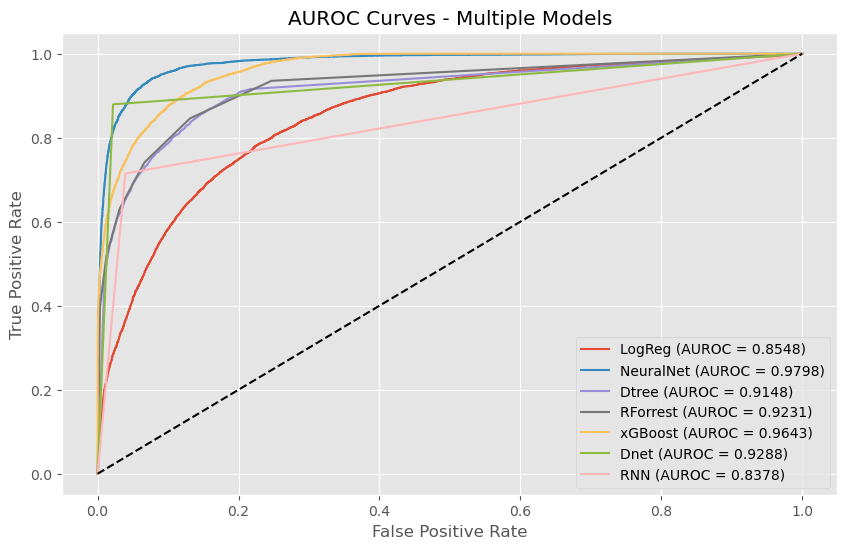

In [48]:
#AUROC Plot

# Define the models and their AUROC curve values
models = ['LogReg', 'NeuralNet', 'Dtree', 'RForrest', 'xGBoost', 'Dnet', 'RNN']
auroc_scores = [logreg_auroc_score, Nnet_auroc_score, dtree_auroc_score, rforrest_auroc_score, xgb_auroc_score, Dnet_auroc_score, Rnet_auroc_score]
fprs = [logreg_fpr, Nnet_fpr, dtree_fpr, rforrest_fpr, xgb_fpr, Dnet_fpr, Rnet_fpr]  # List of false positive rates for each model
tprs = [logreg_tpr, Nnet_tpr, dtree_tpr, rforrest_tpr, xgb_tpr, Dnet_tpr, Rnet_tpr]  # List of true positive rates for each model

# Plot AUROC curves for each model
plt.figure(figsize=(10, 6))
for i in range(len(models)):
    plt.plot(fprs[i], tprs[i], label=f'{models[i]} (AUROC = {auroc_scores[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUROC Curves - Multiple Models')
plt.legend(loc='lower right')
plt.show()

In [49]:

# Combine all model results into single list
model_res = [logreg_results, Nnet_results, rforrest_results, dtree_results, xgb_results, Dnet_results, Rnet_results]
# COnvert to dataframe
result_data = pd.DataFrame(model_res, columns=['Model','AUROC Score','Accuracy', 'Precision', 'Recall', 'F1','Predicted 1s', 'Intended 1s'])
filename_result_data = 'ED_01_result.csv' # filename
print(result_data)

#result_data.to_csv(filename_result_data, index=False) # Create csv 

                Model  AUROC Score  Accuracy  Precision    Recall        F1  \
0  LogisticRegression     0.854800  0.839273   0.824239  0.824239  0.487592   
1           NeuralNet     0.979847  0.945816   0.945269  0.945269  0.865020   
2       RandomForrest     0.923057  0.899842   0.896171  0.899842  0.719850   
3        DecisionTree     0.914780  0.897014   0.893840  0.893840  0.733496   
4             XGBoost     0.964274  0.917143   0.914632  0.917143  0.779727   
5                 DNN     0.928792  0.958009   0.957593  0.958009  0.895244   
6                 RNN     0.837759  0.910484   0.907636  0.910484  0.765194   

   Predicted 1s  Intended 1s  
0          3606         6710  
1          6492         6710  
2          5048         6710  
3          5999         6710  
4          5661         6710  
5          6473         6710  
6          5828         6710  


In [65]:
from tabulate import tabulate
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
conf_matrix = confusion_matrix(Out_test, logreg_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity_logreg = TP / (TP + FN)
specificity_logreg = TN / (TN + FP)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Out_test, Nnet_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity_nnet = TP / (TP + FN)
specificity_nnet = TN / (TN + FP)

# Compute the confusion matrix
conf_matrix = confusion_matrix(Out_test, dtree_pred)
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]
sensitivity_dtree = TP / (TP + FN)
specificity_dtree = TN / (TN + FP)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(Out_test, rforrest_pred)
tn, fp, fn, tp = confusion_mat.ravel()
sensitivity_rforest = tp / (tp + fn)
specificity_rforest = tn / (tn + fp)

# Compute the confusion matrix
xgb_conf_matrix = confusion_matrix(Out_test, xgb_pred)
xgb_TP = xgb_conf_matrix[1, 1]
xgb_TN = xgb_conf_matrix[0, 0]
xgb_FP = xgb_conf_matrix[0, 1]
xgb_FN = xgb_conf_matrix[1, 0]
xgb_sensitivity = xgb_TP / (xgb_TP + xgb_FN)
xgb_specificity = xgb_TN / (xgb_TN + xgb_FP)

# Compute the confusion matrix
Dnet_conf_matrix = confusion_matrix(Out_test[:len(y_pred_labels)], y_pred_labels)
Dnet_TP = Dnet_conf_matrix[1, 1]
Dnet_TN = Dnet_conf_matrix[0, 0]
Dnet_FP = Dnet_conf_matrix[0, 1]
Dnet_FN = Dnet_conf_matrix[1, 0]
Dnet_sensitivity = Dnet_TP / (Dnet_TP + Dnet_FN)
Dnet_specificity = Dnet_TN / (Dnet_TN + Dnet_FP)

# Compute the confusion matrix
Rnet_conf_matrix = confusion_matrix(Out_test[:len(y_pred_labels)], y_pred_labels)
Rnet_TP = Rnet_conf_matrix[1, 1]
Rnet_TN = Rnet_conf_matrix[0, 0]
Rnet_FP = Rnet_conf_matrix[0, 1]
Rnet_FN = Rnet_conf_matrix[1, 0]
Rnet_sensitivity = Rnet_TP / (Rnet_TP + Rnet_FN)
Rnet_specificity = Rnet_TN / (Rnet_TN + Rnet_FP)

# Create the table
table = [
    ["Model", "Sensitivity", "Specificity"],
    ["LogReg", sensitivity_logreg, specificity_logreg],
    ["Nnet", sensitivity_nnet, specificity_nnet],
    ["Dtree", sensitivity_dtree, specificity_dtree],
    ["Rforest", sensitivity_rforest, specificity_rforest],
    ["XGB", xgb_sensitivity, xgb_specificity],
    ["Dnet", Dnet_sensitivity, Dnet_specificity],
    ["Rnet", Rnet_sensitivity, Rnet_specificity]
]

# Display the table
print(tabulate(table, headers="firstrow"))


Model      Sensitivity    Specificity
-------  -------------  -------------
LogReg        0.374814       0.958324
Nnet          0.850969       0.970128
Dtree         0.694635       0.948888
Rforest       0.6307         0.968829
XGB           0.718778       0.967988
Dnet          0.714903       0.960616
Rnet          0.714903       0.960616


In [67]:
import numpy as np
from sklearn.utils import resample
from tabulate import tabulate

# Specify the number of bootstrap iterations
n_iterations = 1000

# Define a function to calculate the AUROC score and confidence interval
def calculate_auroc_ci(pred_proba_class, Out_test):
    # Create an empty list to store the AUROC scores from each iteration
    auroc_scores = []

    # Perform bootstrapping and calculate AUROC scores
    for _ in range(n_iterations):
        # Create a bootstrap sample by resampling the predictions and true labels
        bootstrap_indices = resample(range(len(pred_proba_class)))
        bootstrap_pred = pred_proba_class[bootstrap_indices]
        bootstrap_true = Out_test.values[bootstrap_indices]

        # Calculate AUROC score for the bootstrap sample
        bootstrap_auroc = roc_auc_score(bootstrap_true, bootstrap_pred)

        # Add the AUROC score to the list
        auroc_scores.append(bootstrap_auroc)

    # Calculate the mean AUROC score
    mean_auroc = np.mean(auroc_scores)

    # Calculate the standard deviation of AUROC scores
    std_auroc = np.std(auroc_scores)

    # Calculate the lower and upper bounds of the confidence interval
    alpha = 0.95
    lower_bound = np.percentile(auroc_scores, (1 - alpha) / 2 * 100)
    upper_bound = np.percentile(auroc_scores, (1 + alpha) / 2 * 100)
    
    return mean_auroc, lower_bound, upper_bound

# Define the model names and their corresponding predictions and true labels
models = [
    ("LogReg", logreg_pred_proba_class, Out_test),
    ("Nnet", Nnet_pred_proba_class, Out_test),
    ("Dtree", dtree_pred_proba_class, Out_test),
    ("Rforrest", rforrest_pred_proba_class, Out_test),
    ("XGB", xgb_pred_proba[:, class_index], Out_test),
    ("Dnet", y_pred_labels, Out_test),
    ("Rnet", y_pred_labels, Out_test)
]

# Create the table
table = [["Model", "AUROC Score", "95% Confidence Interval"]]
for model in models:
    model_name, pred_proba_class, true_labels = model
    mean_auroc, lower_bound, upper_bound = calculate_auroc_ci(pred_proba_class, true_labels)
    table.append([model_name, mean_auroc, "[{:.3f}, {:.3f}]".format(lower_bound, upper_bound)])

# Display the table
print(tabulate(table, headers="firstrow"))


Model       AUROC Score  95% Confidence Interval
--------  -------------  -------------------------
LogReg         0.854796  [0.850, 0.860]
Nnet           0.979891  [0.978, 0.981]
Dtree          0.91473   [0.911, 0.919]
Rforrest       0.922978  [0.919, 0.927]
XGB            0.96424   [0.962, 0.966]
Dnet           0.837808  [0.832, 0.843]
Rnet           0.837794  [0.833, 0.843]


In [2]:
import pickle

# Save the model to a file
with open("dnet_model.pkl", "wb") as file:
    pickle.dump(model, file)

NameError: name 'model' is not defined